In [491]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import sklearn as sk
import test

In [492]:
data = pd.read_csv('Crashes_per_day.csv')
data['CRASH_DATE'] = pd.to_datetime(data['CRASH_DATE'])
data = data.set_index('CRASH_DATE')
data

,COUNT
CRASH_DATE,
2016-01-01,72
2016-01-02,79
2016-01-03,65
2016-01-04,91
2016-01-05,101
...,...
2024-12-27,275
2024-12-28,211
2024-12-29,191


In [493]:
# Ensure 'CRASH_DATE' is in datetime format
data.index = pd.to_datetime(data.index)

# Group by year and month and calculate the sum for each
data_monthly = data.groupby(data.index.to_period('M')).sum()
data_monthly.index = pd.to_datetime(data_monthly.index.to_timestamp())

data_monthly.head(12)


,COUNT
CRASH_DATE,
2016-01-01,2765
2016-02-01,2539
2016-03-01,2916
2016-04-01,2902
2016-05-01,3091
2016-06-01,2831
2016-07-01,3316
2016-08-01,4461
2016-09-01,4709


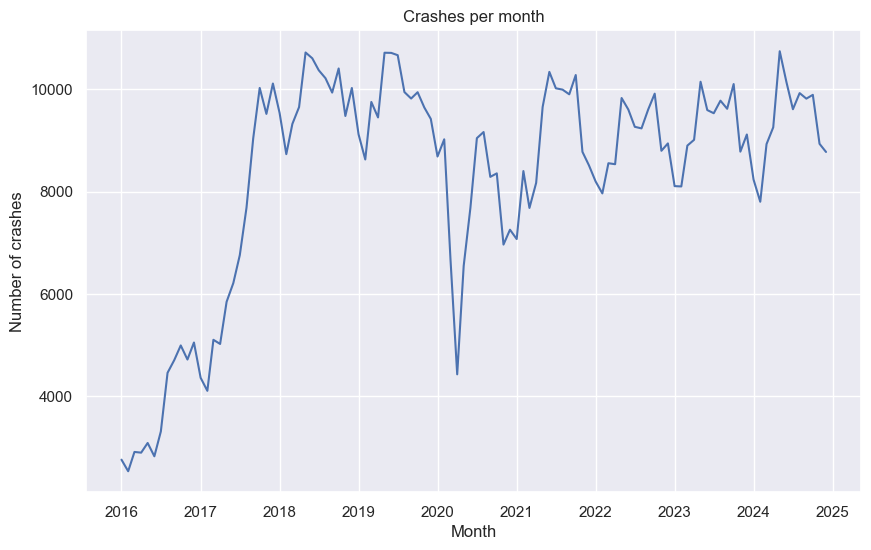

In [494]:
plt.figure(figsize=(10,6))
plt.plot(data_monthly['COUNT'])
plt.title('Crashes per month')
plt.xlabel('Month')
plt.ylabel('Number of crashes')
plt.show()


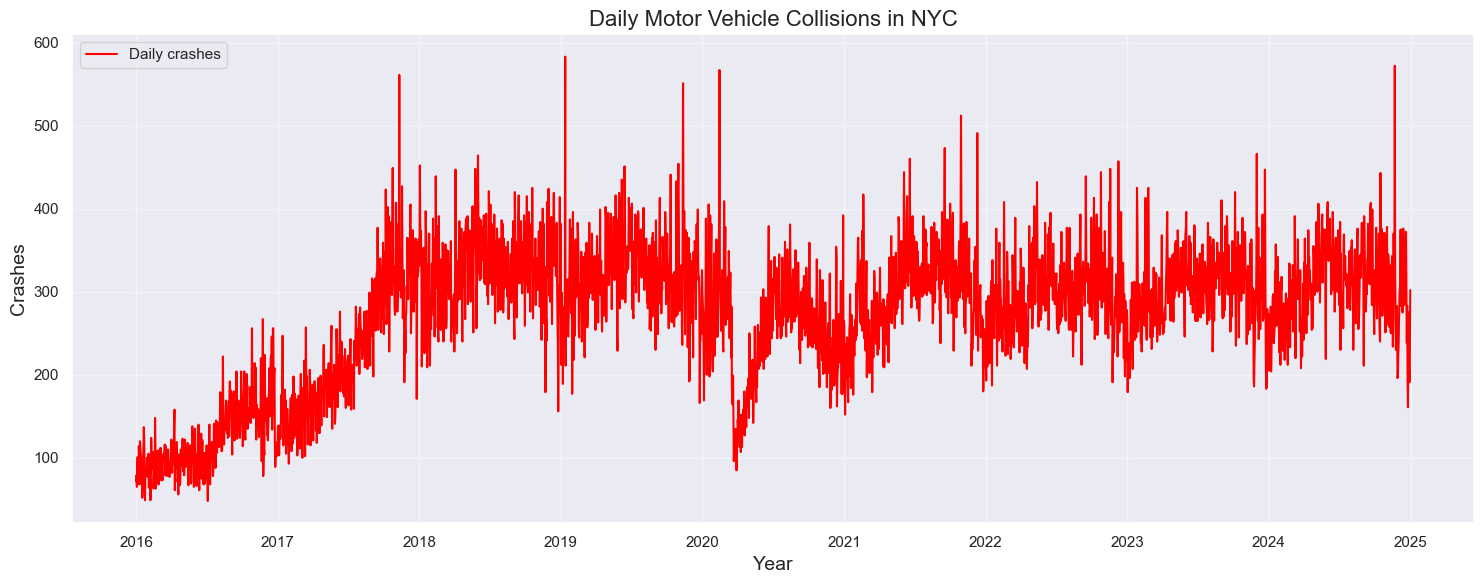

In [495]:
data

# Set plot style
sns.set(style="darkgrid")

# Plot the daily crashes time series
plt.figure(figsize=(15, 6))
# Assuming daily_crashes is a DataFrame with a datetime index and a column 'crash_count'
plt.plot(data['COUNT'], label='Daily crashes', color="red")
plt.title('Daily Motor Vehicle Collisions in NYC', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Crashes', fontsize=14)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [496]:
import pandas as pd
import numpy as np

# Ensure index is in datetime format
data_monthly.index = pd.to_datetime(data_monthly.index)

# Calculate the number of months since the start
data_monthly['time_elapsed'] = (
    (data_monthly.index.year - data_monthly.index.min().year) * 12 +
    (data_monthly.index.month - data_monthly.index.min().month)
)

print(data_monthly.head(14))  # Now X is numeric!


            COUNT  time_elapsed
CRASH_DATE                     
2016-01-01   2765             0
2016-02-01   2539             1
2016-03-01   2916             2
2016-04-01   2902             3
2016-05-01   3091             4
2016-06-01   2831             5
2016-07-01   3316             6
2016-08-01   4461             7
2016-09-01   4709             8
2016-10-01   4995             9
2016-11-01   4720            10
2016-12-01   5052            11
2017-01-01   4363            12
2017-02-01   4109            13


In [497]:
data_monthly

,COUNT,time_elapsed
CRASH_DATE,,
2016-01-01,2765,0
2016-02-01,2539,1
2016-03-01,2916,2
2016-04-01,2902,3
2016-05-01,3091,4
...,...,...
2024-08-01,9921,103
2024-09-01,9813,104
2024-10-01,9887,105


In [498]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_monthly['COUNT'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("Time series is not stationary.")
else:
    print("Time series is stationary.")


ADF Statistic: -3.6062527389176124
p-value: 0.005642607825694792
Time series is stationary.


#Normalizing the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data[["COUNT"]])
data_normalized = pd.DataFrame(data_normalized, columns=["COUNT"], index=data.index)
data_normalized

# Linear Regression

In [499]:
data.columns

Index(['COUNT'], dtype='object')

In [500]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [501]:

# Ensure X_train and X_test retain their index
X_train, X_test, y_train, y_test = train_test_split(data_monthly[['time_elapsed']], data_monthly['COUNT'], 
                                                    test_size=0.2,shuffle= False, random_state=42)

# Now X_train and X_test are DataFrames with the original index


In [502]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Intercept (b):", lr.intercept_)
print("Slope (m):", lr.coef_)


Intercept (b): 5803.954290296711
Slope (m): [52.29218359]


In [503]:
y_pred = lr.predict(X_test)  # Predict values on training data
print("Predicted values:", y_pred)

Predicted values: [10301.08207934 10353.37426294 10405.66644653 10457.95863012
 10510.25081372 10562.54299731 10614.8351809  10667.1273645
 10719.41954809 10771.71173169 10824.00391528 10876.29609887
 10928.58828247 10980.88046606 11033.17264965 11085.46483325
 11137.75701684 11190.04920043 11242.34138403 11294.63356762
 11346.92575121 11399.21793481]


In [504]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute errors
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 2678262.787436955
R² Score: -4.899492322943286


In [505]:
X_train

,time_elapsed
CRASH_DATE,
2016-01-01,0
2016-02-01,1
2016-03-01,2
2016-04-01,3
2016-05-01,4
...,...
2022-10-01,81
2022-11-01,82
2022-12-01,83


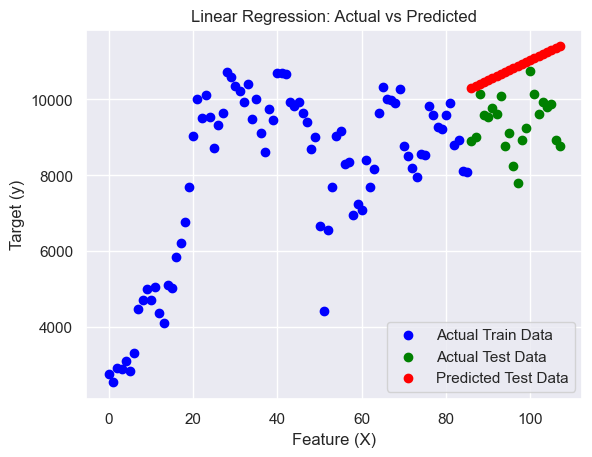

In [506]:
import matplotlib.pyplot as plt

# Plot actual training data
plt.scatter(X_train, y_train, color="blue", label="Actual Train Data")

# Plot regression line on training data


# Plot actual test data
plt.scatter(X_test, y_test, color="green", label="Actual Test Data")
plt.scatter(X_test, y_pred, color="red", label="Predicted Test Data")
# Plot predicted values for test set

# Labels and title
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()


## For residual data

In [507]:
data_monthly

,COUNT,time_elapsed
CRASH_DATE,,
2016-01-01,2765,0
2016-02-01,2539,1
2016-03-01,2916,2
2016-04-01,2902,3
2016-05-01,3091,4
...,...,...
2024-08-01,9921,103
2024-09-01,9813,104
2024-10-01,9887,105


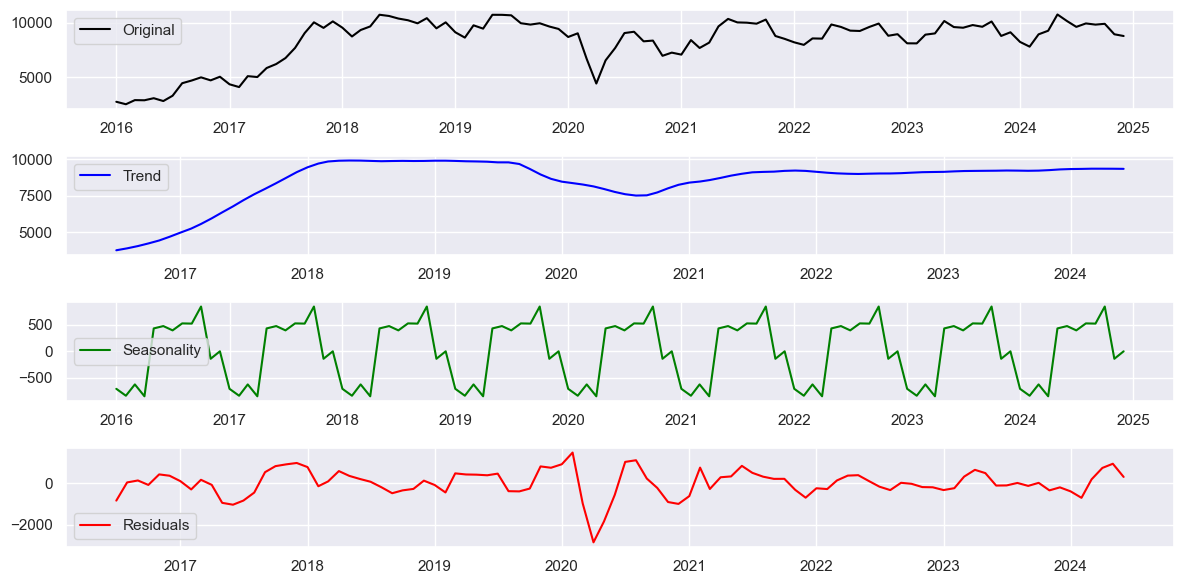

CRASH_DATE
2016-07-01    3758.000000
2016-08-01    3890.000000
2016-09-01    4046.625000
2016-10-01    4226.250000
2016-11-01    4429.500000
                 ...     
2024-02-01    9345.166667
2024-03-01    9359.583333
2024-04-01    9359.041667
2024-05-01    9356.625000
2024-06-01    9348.791667
Freq: MS, Name: trend, Length: 96, dtype: float64


In [508]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(data_monthly['COUNT'], model='additive', period=12)
trend = decompose.trend
trend = trend.dropna()
seasonal = decompose.seasonal
residual = decompose.resid

residual.dropna(inplace=True)

plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(data_monthly["COUNT"], label="Original", color="black")
plt.legend()
plt.subplot(412)
plt.plot(trend, label="Trend", color="blue")
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label="Seasonality", color="green")
plt.legend()
plt.subplot(414)
plt.plot(residual, label="Residuals", color="red")
plt.legend()
plt.tight_layout()
plt.show()

print(trend)


In [509]:
seasonal.isnull().sum()

np.int64(0)

In [510]:
import pandas as pd

# Function to convert DataFrame and add time_lapsed in months
def add_time_lapsed_months(df, column_name=None):
    df = pd.DataFrame(df)  # Ensure it's a DataFrame
    df.index = pd.to_datetime(df.index)  # Convert index to datetime
    if column_name:  # If a specific column is provided, rename it
        df.columns = [column_name]
    # Calculate months elapsed
    df['time_lapsed'] = (
        (df.index.year - df.index.min().year) * 12 +
        (df.index.month - df.index.min().month)
    )
    return df

# Apply to residual, trend, and seasonal
residual = add_time_lapsed_months(residual, column_name='residual')
trend = add_time_lapsed_months(trend, column_name='trend')
seasonal = add_time_lapsed_months(seasonal, column_name='seasonal')

# Display the resulting DataFrames
print(residual.head())
print(trend.head())
print(seasonal.head())


              residual  time_lapsed
CRASH_DATE                         
2016-07-01 -835.428819            0
2016-08-01   45.451389            1
2016-09-01  140.649306            2
2016-10-01  -76.100694            3
2016-11-01  435.180556            4
               trend  time_lapsed
CRASH_DATE                       
2016-07-01  3758.000            0
2016-08-01  3890.000            1
2016-09-01  4046.625            2
2016-10-01  4226.250            3
2016-11-01  4429.500            4
              seasonal  time_lapsed
CRASH_DATE                         
2016-01-01 -713.487847            0
2016-02-01 -844.185764            1
2016-03-01 -630.081597            2
2016-04-01 -855.019097            3
2016-05-01  430.319444            4


Final MSE: 172779.77867991812
Final R² Score: 0.7026026933339833


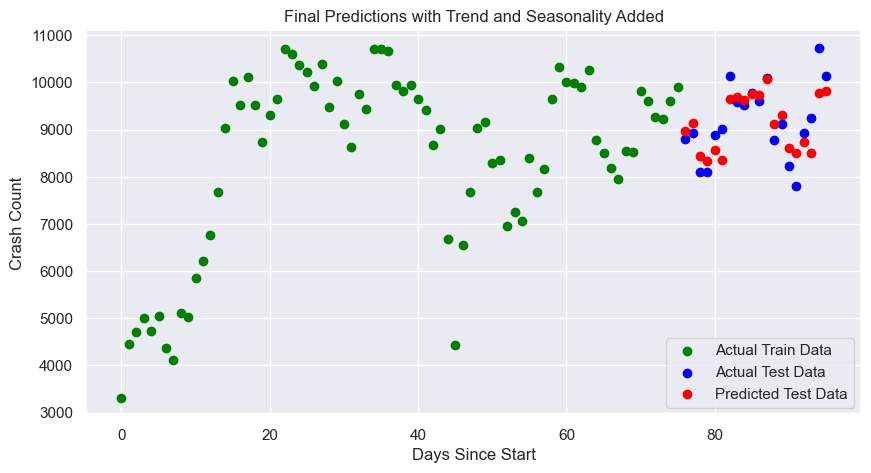

In [511]:
# Step 1: Use decomposed components (ensure indices are datetime and aligned)
trend = decompose.trend.dropna()  # Trend component
seasonality = decompose.seasonal.dropna()  # Seasonality component

# Step 2: Train Linear Regression on residuals
X = residual['time_lapsed'].values.reshape(-1, 1)
y = residual['residual'].values  # Ensure 'residual' column exists in residual

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict residuals
y_pred_residuals = lr.predict(X_test)

# Step 3: Add back trend and seasonality for the final prediction
# Align trend and seasonality with X_train and X_test indices
trend_test = trend.loc[trend.index.isin(residual.index[X_test.flatten()])]
trend_train = trend.loc[trend.index.isin(residual.index[X_train.flatten()])]
seasonality_test = seasonality.loc[seasonality.index.isin(residual.index[X_test.flatten()])]
seasonality_train = seasonality.loc[seasonality.index.isin(residual.index[X_train.flatten()])]

# Final prediction: Residual + Trend + Seasonality
final_predictions = y_pred_residuals + trend_test.values + seasonality_test.values

# Evaluate the final predictions
mse = mean_squared_error(y_test + trend_test.values + seasonality_test.values, final_predictions)
r2 = r2_score(y_test + trend_test.values + seasonality_test.values, final_predictions)

print(f"Final MSE: {mse}")
print(f"Final R² Score: {r2}")

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train + trend_train.values + seasonality_train.values, color="green", label="Actual Train Data")
plt.scatter(X_test, y_test + trend_test.values + seasonality_test.values, color="blue", label="Actual Test Data")
plt.scatter(X_test, final_predictions, color="red", label="Predicted Test Data")
plt.xlabel("Days Since Start")
plt.ylabel("Crash Count")
plt.title("Final Predictions with Trend and Seasonality Added")
plt.legend()
plt.show()


In [512]:
residual

,residual,time_lapsed
CRASH_DATE,,
2016-07-01,-835.428819,0
2016-08-01,45.451389,1
2016-09-01,140.649306,2
2016-10-01,-76.100694,3
2016-11-01,435.180556,4
...,...,...
2024-02-01,-700.980903,91
2024-03-01,195.498264,92
2024-04-01,748.977431,93


In [513]:
trend_test = trend_test[1:]
seasonality_test = seasonality_test[1:]

Selected Lags: [1, 2]
MSE: 164627.57100241343
R²: 0.7271716897770037
AIC: 1024.3177526485294


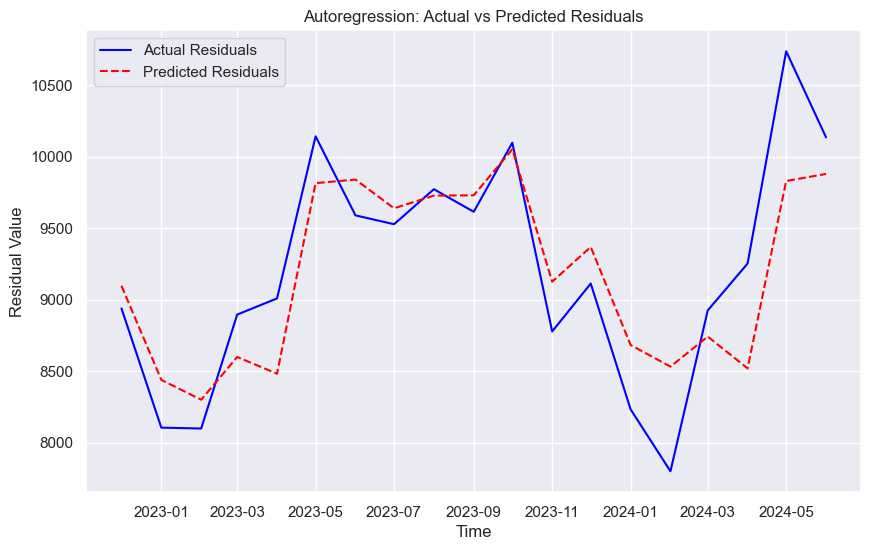

In [556]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Ensure residual index is DatetimeIndex and assign frequency
residual.index = pd.to_datetime(residual.index)  

# Split train and test
train = residual.iloc[:-int(len(residual) * 0.2)]
test = residual.iloc[-int(len(residual) * 0.2):]

# Select optimal lag order for AR model
selector = ar_select_order(train['residual'], maxlag=35, seasonal=False)
optimal_lags = selector.ar_lags  
print(f"Selected Lags: {optimal_lags}")

# Train the AutoReg model
# For loop to test different lag orders
model = AutoReg(train["residual"], lags=11).fit()
predicted = model.forecast(steps=len(test))
final_prediction = predicted.values + trend_test.values + seasonality_test.values
mse = mean_squared_error(test['residual']+trend_test+seasonality_test, final_prediction)
r2 = r2_score(test['residual']+trend_test+seasonality_test, final_prediction)

print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"AIC: {model.aic}")
  

# Plot actual vs predicted residuals
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['residual']+trend_test.values+seasonality_test.values, label="Actual Residuals", color="blue")
plt.plot(test.index, final_prediction, label="Predicted Residuals", color="red", linestyle="--")
plt.title("Autoregression: Actual vs Predicted Residuals")
plt.xlabel("Time")
plt.ylabel("Residual Value")
plt.legend()
plt.show()


In [515]:
seasonality_test

CRASH_DATE
2022-12-01     -3.180556
2023-01-01   -713.487847
2023-02-01   -844.185764
2023-03-01   -630.081597
2023-04-01   -855.019097
2023-05-01    430.319444
2023-06-01    474.762153
2023-07-01    393.428819
2023-08-01    525.548611
2023-09-01    521.725694
2023-10-01    844.850694
2023-11-01   -144.680556
2023-12-01     -3.180556
2024-01-01   -713.487847
2024-02-01   -844.185764
2024-03-01   -630.081597
2024-04-01   -855.019097
2024-05-01    430.319444
2024-06-01    474.762153
Freq: MS, Name: seasonal, dtype: float64

In [516]:
residual.iloc[0:10]

,residual,time_lapsed
CRASH_DATE,,
2016-07-01,-835.428819,0
2016-08-01,45.451389,1
2016-09-01,140.649306,2
2016-10-01,-76.100694,3
2016-11-01,435.180556,4
2016-12-01,369.972222,5
2017-01-01,106.987847,6
2017-02-01,-294.064236,7
2017-03-01,173.123264,8


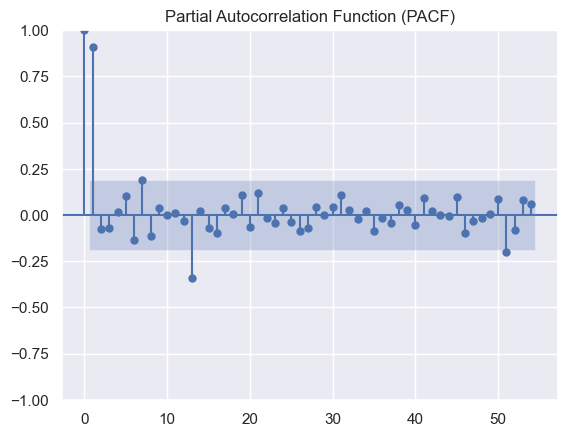

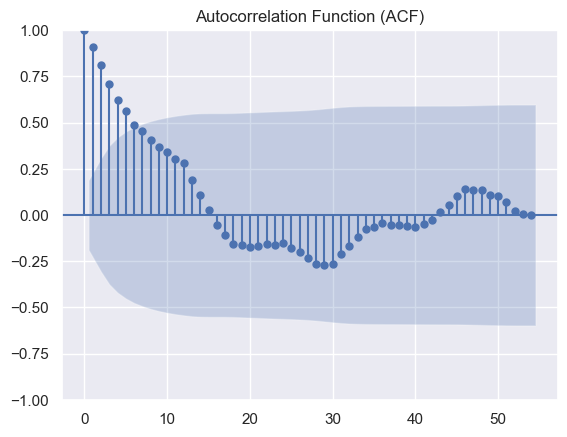

In [559]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg,ar_select_order

pacf = plot_pacf(data_monthly['COUNT'], lags=54, title="Partial Autocorrelation Function (PACF)")
acf = plot_acf(data_monthly['COUNT'], lags=54, title="Autocorrelation Function (ACF)")





# ARIMA

In [518]:
test['residual'].values

array([-190.19444444, -324.47048611, -233.35590278,  326.45659722,
        656.01909722,  497.55555556, -106.42881944,  -99.67881944,
         20.32638889, -122.60069444,   25.89930556, -339.52777778,
       -193.56944444, -389.26215278, -700.98090278,  195.49826389,
        748.97743056,  951.05555556,  312.44618056])

In [547]:
from statsmodels.tsa.arima.model import ARIMA
#split data into test and train
train = residual.iloc[:-int(len(residual) * 0.2)]
test = residual.iloc[-int(len(residual) * 0.2):]

# deploy ARIMA model

""" best_r2 = 0
for i in range(1,20):
    arima = ARIMA(train['residual'], order=(11, 0, i))
    arima_fit = arima.fit()  # Fit the model
    arima_pred = arima_fit.predict(start = test.index[0], end = test.index[-1], typ='levels')
    a_final_prediction = arima_pred.values + trend_test.values + seasonality_test.values

    mse = mean_squared_error(test['residual']+trend_test+seasonality_test, a_final_prediction)
    r2 = r2_score(test['residual']+trend_test+seasonality_test, a_final_prediction)
    if r2 > best_r2:
        print(f"Model with {i} lags:")
        print(f"MSE: {mse}")
        print(f"R²: {r2}")
        best_r2 = r2*/ """

arima = ARIMA(train['residual'], order=(11, 0, 9))
arima_fit = arima.fit()  # Fit the model
arima_pred = arima_fit.predict(start = test.index[0], end = test.index[-1], typ='levels')
a_final_prediction = arima_pred.values + trend_test.values + seasonality_test.values

mse = mean_squared_error(test['residual']+trend_test+seasonality_test, a_final_prediction)
r2 = r2_score(test['residual']+trend_test+seasonality_test, a_final_prediction)
print(f"Model with {i} lags:")
print(f"MSE: {mse}")
print(f"R²: {r2}")



c:\Users\byash\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\byash\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model with 19 lags:
MSE: 155035.40366208693
R²: 0.7430682664615927


c:\Users\byash\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\byash\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


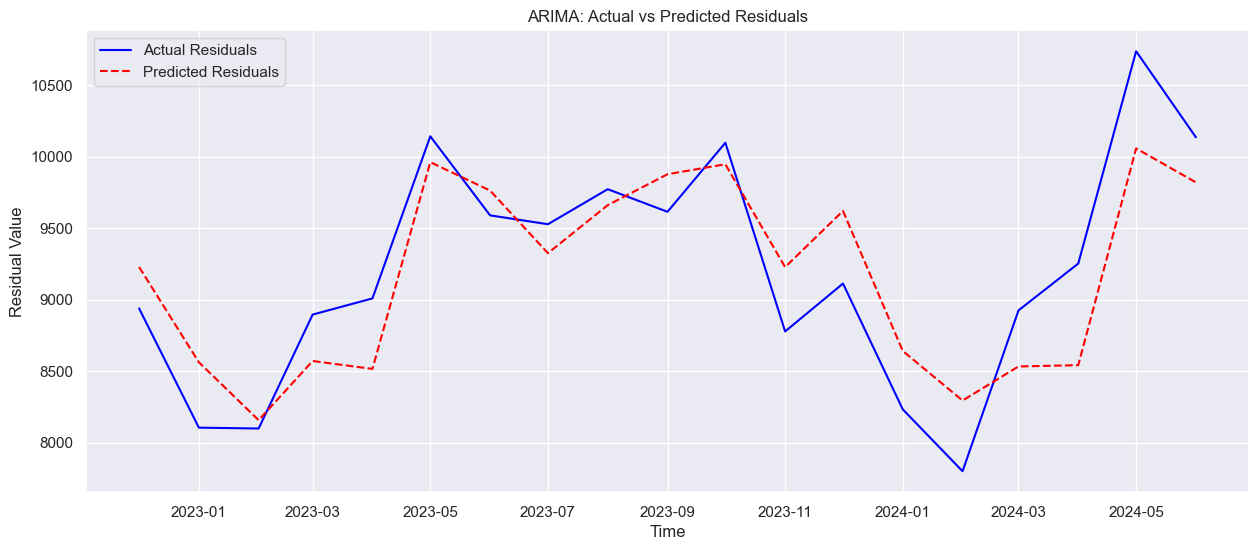

In [548]:
plt.figure(figsize=(15, 6))
plt.plot(test.index, test['residual']+trend_test.values+seasonality_test.values, label="Actual Residuals", color="blue")
plt.plot(test.index, arima_pred+ trend_test.values+seasonality_test.values, label="Predicted Residuals", color="red", linestyle="--")
plt.title("ARIMA: Actual vs Predicted Residuals")
plt.xlabel("Time")
plt.ylabel("Residual Value")
plt.legend()
plt.show()

# SARIMA

In [560]:
data_monthly

,COUNT,time_elapsed
CRASH_DATE,,
2016-01-01,2765,0
2016-02-01,2539,1
2016-03-01,2916,2
2016-04-01,2902,3
2016-05-01,3091,4
...,...,...
2024-08-01,9921,103
2024-09-01,9813,104
2024-10-01,9887,105


In [579]:
from pmdarima import auto_arima

auto_model = auto_arima(data_monthly, seasonal=True, m=12, stepwise=True, trace=True)
print(auto_model.summary())


ModuleNotFoundError: No module named 'pmdarima'

c:\Users\byash\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\byash\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


R²: 0.7256241945297898
MSE: 127166.38181320066


c:\Users\byash\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\byash\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


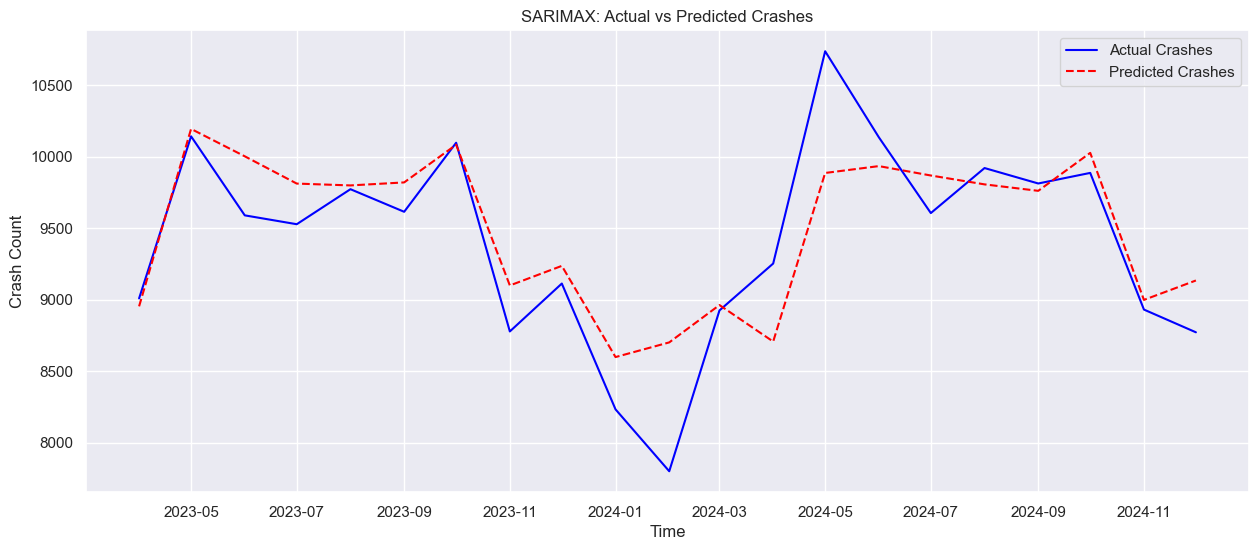

In [578]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMAX model
train = data_monthly.iloc[:-int(len(data_monthly)* 0.2)]
test = data_monthly.iloc[-int(len(data_monthly) * 0.2):]

sarimax = SARIMAX(train['COUNT'], order=(11, 0, 9), seasonal_order=(1, 1, 1, 12))
sarimax_fit = sarimax.fit()
sarimax_pred = sarimax_fit.predict(start = test.index[0], end = test.index[-1], typ='levels')
R2 = r2_score(test['COUNT'], sarimax_pred)
MSE = mean_squared_error(test['COUNT'], sarimax_pred)
print(f"R²: {R2}")
print(f"MSE: {MSE}")

plt.figure(figsize=(15, 6))
plt.plot(test.index, test['COUNT'], label="Actual Crashes", color="blue")
plt.plot(test.index, sarimax_pred, label="Predicted Crashes", color="red", linestyle="--")
plt.title("SARIMAX: Actual vs Predicted Crashes")
plt.xlabel("Time")
plt.ylabel("Crash Count")
plt.legend()

